P90 GIIP  ≈ 247.3 BSCF
P50 GIIP  ≈ 297.5 BSCF
P10 GIIP  ≈ 355.0 BSCF


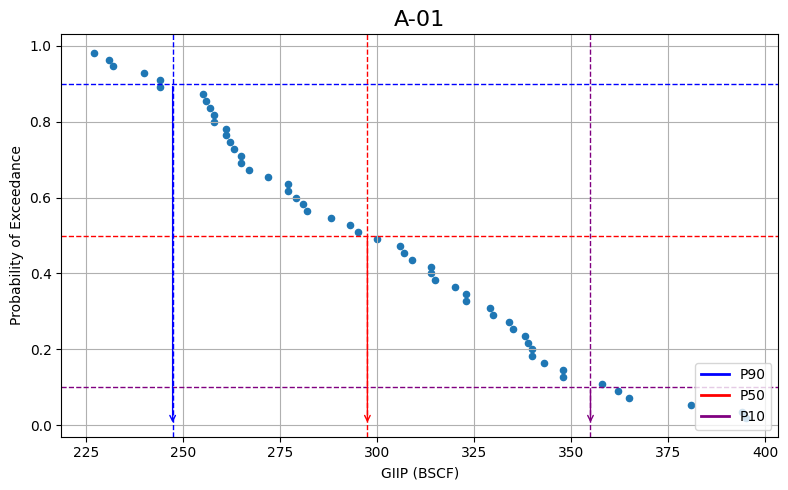

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# 1) อ่านไฟล์ GIIP
# -------------------------
# ถ้าเป็น .csv ให้ใช้ read_csv แทน
df = pd.read_csv("GIIP.csv")

# รวมค่าจากทุกคอลัมน์ที่ต้องการใช้
cols = ["Short Range", "Medium Range", "Long Range"]
giip = df[cols].values.flatten()      # แปลงเป็น 1D array
giip = giip[~np.isnan(giip)]         # ตัดค่า NaN ทิ้งถ้ามี

# -------------------------
# 2) เตรียมข้อมูลสำหรับ plot
# -------------------------
giip_sorted = np.sort(giip)          # เรียงจากน้อยไปมาก
n = len(giip_sorted)

# ใช้ empirical CDF แล้วกลับด้านให้เป็น "probability of exceedance"
ranks = np.arange(1, n + 1)
p_cdf = ranks / (n + 1)              # 0–1 (จากล่างขึ้นบน)
p_exceed = 1 - p_cdf                 # 1–0 (เหมือนกราฟตัวอย่าง)

# -------------------------
# 3) หา P90, P50, P10
#    (ใช้คำนิยามแบบสำรวจปริมาณสำรองทั่วไป)
#    P90 = 10th percentile
#    P50 = 50th percentile
#    P10 = 90th percentile
# -------------------------
P90_val = np.quantile(giip_sorted, 0.10)
P50_val = np.quantile(giip_sorted, 0.50)
P10_val = np.quantile(giip_sorted, 0.90)

print(f"P90 GIIP  ≈ {P90_val:.1f} BSCF")
print(f"P50 GIIP  ≈ {P50_val:.1f} BSCF")
print(f"P10 GIIP  ≈ {P10_val:.1f} BSCF")

# -------------------------
# 4) Plot กราฟแบบในรูป
# -------------------------
fig, ax = plt.subplots(figsize=(8, 5))

# จุด GIIP vs probability
ax.scatter(giip_sorted, p_exceed, s=20)

# เส้นแนวนอนระดับ P ต่าง ๆ
ax.axhline(0.90, color="blue",  linestyle="--", linewidth=1)
ax.axhline(0.50, color="red",   linestyle="--", linewidth=1)
ax.axhline(0.10, color="purple",linestyle="--", linewidth=1)

# เส้นแนวตั้ง GIIP ที่เป็นตัวแทน P ต่าง ๆ
ax.axvline(P90_val, color="blue",  linestyle="--", linewidth=1)
ax.axvline(P50_val, color="red",   linestyle="--", linewidth=1)
ax.axvline(P10_val, color="purple",linestyle="--", linewidth=1)

# ลูกศร (แนวตั้ง) ชี้ลงมาที่แกน x
ax.annotate("", xy=(P90_val, 0.0),  xytext=(P90_val, 0.90),
            arrowprops=dict(arrowstyle="->", color="blue"))
ax.annotate("", xy=(P50_val, 0.0),  xytext=(P50_val, 0.50),
            arrowprops=dict(arrowstyle="->", color="red"))
ax.annotate("", xy=(P10_val, 0.0),  xytext=(P10_val, 0.10),
            arrowprops=dict(arrowstyle="->", color="purple"))

# ใส่ label
ax.set_title("A-01", fontsize=16)
ax.set_xlabel("GIIP (BSCF)")
ax.set_ylabel("Probability of Exceedance")

# legend แบบเดียวกับรูป
from matplotlib.lines import Line2D
legend_lines = [
    Line2D([0], [0], color="blue",  lw=2),
    Line2D([0], [0], color="red",   lw=2),
    Line2D([0], [0], color="purple",lw=2),
]
ax.legend(legend_lines, ["P90", "P50", "P10"], loc="lower right")

ax.grid(True)
plt.tight_layout()
plt.show()
